In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load credit card dataset
df=pd.read_csv('handling imblanced dataset/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64


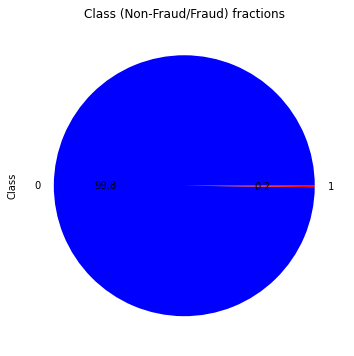

In [36]:
df.Class.value_counts().plot(kind="pie",figsize=(7,6),autopct="%1.1f",colors=["b","r"])
plt.title("Class (Non-Fraud/Fraud) fractions")
print(df.Class.value_counts())

Text(0, 0.5, 'Count')

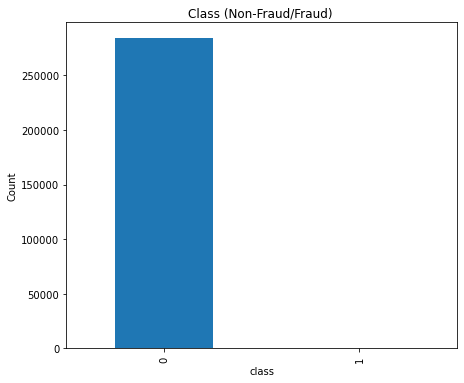

In [33]:
df.Class.value_counts().plot(kind="bar",figsize=(7,6))
plt.title("Class (Non-Fraud/Fraud) ")
plt.xlabel("class")
plt.ylabel("Count")


In [37]:
X=df.drop('Class',axis=1)
y=df.Class

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=None)

# Deal with imbalanced dataset with logistic regression with hyperparameter optimization

In [42]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(xtrain,ytrain)

C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [43]:
clf.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [44]:
clf.best_score_

0.8450268353916893

In [46]:
ypred=clf.predict(xtest)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [48]:
accuracy_score(ytest,ypred)

0.9990285921608558

In [49]:
confusion_matrix(ytest,ypred)

array([[85271,    36],
       [   47,    89]], dtype=int64)

In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.65      0.68       136

    accuracy                           1.00     85443
   macro avg       0.86      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



# using class weights

In [79]:
class_weight={0:1,1:80}
log_class=LogisticRegression(C=10.0,penalty='l2',class_weight=class_weight,random_state=None)

In [64]:
log_class.fit(xtrain,ytrain)

C:\Users\princ\Anaconda2\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0, class_weight={0: 1, 1: 75})

In [65]:
ypred=log_class.predict(xtest)

In [66]:
accuracy_score(ytest,ypred)

0.9911754034853645

In [67]:
confusion_matrix(ytest,ypred)

array([[84575,   732],
       [   22,   114]], dtype=int64)

# using ensemble learning with class weights

In [80]:
classifier=RandomForestClassifier(class_weight=class_weight,n_estimators=200,random_state=None)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(class_weight={0: 1, 1: 80}, n_estimators=200)

In [81]:
ypred=classifier.predict(xtest)

In [82]:
print(accuracy_score(ytest,ypred))
print("\n")
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred))

0.9995435553526912


[[85303     4]
 [   35   101]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.74      0.84       136

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# UnderSampling using nearmiss

In [85]:
from imblearn.under_sampling import NearMiss

In [88]:
ns=NearMiss(sampling_strategy=0.8)
xtrain_ns,ytrain_ns=ns.fit_sample(xtrain,ytrain)


In [94]:
print("The number of classes before fit\n{}\n".format(ytrain.value_counts()))
print("The number of classes after fit\n{}\n".format(ytrain_ns.value_counts()))

The number of classes before fit
0    199008
1       356
Name: Class, dtype: int64

The number of classes after fit
0    445
1    356
Name: Class, dtype: int64



In [95]:
classifier=RandomForestClassifier(n_estimators=200,random_state=None)
classifier.fit(xtrain_ns,ytrain_ns)

RandomForestClassifier(n_estimators=200)

In [96]:
ypred=classifier.predict(xtest)
print(accuracy_score(ytest,ypred))
print("\n")
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred))

0.6762988190957715


[[57659 27648]
 [   10   126]]


              precision    recall  f1-score   support

           0       1.00      0.68      0.81     85307
           1       0.00      0.93      0.01       136

    accuracy                           0.68     85443
   macro avg       0.50      0.80      0.41     85443
weighted avg       1.00      0.68      0.81     85443



# Oversampling using Random Oversampler

In [98]:
from imblearn.over_sampling import RandomOverSampler

In [101]:
os=RandomOverSampler(sampling_strategy=0.8)
xtrain_ns,ytrain_ns=os.fit_sample(xtrain,ytrain)

In [102]:
print("The number of classes before fit\n{}\n".format(ytrain.value_counts()))
print("The number of classes after fit\n{}\n".format(ytrain_ns.value_counts()))

The number of classes before fit
0    199008
1       356
Name: Class, dtype: int64

The number of classes after fit
0    199008
1    159206
Name: Class, dtype: int64



In [103]:
classifier=RandomForestClassifier(n_estimators=200,random_state=None)
classifier.fit(xtrain_ns,ytrain_ns)

RandomForestClassifier(n_estimators=200)

In [104]:
ypred=classifier.predict(xtest)
print(accuracy_score(ytest,ypred))
print("\n")
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred))

0.9995786664794073


[[85301     6]
 [   30   106]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.78      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# oversampling using smotetomek

In [105]:
from imblearn.combine import SMOTETomek

In [106]:
os=SMOTETomek(sampling_strategy=0.8)
xtrain_ns,ytrain_ns=os.fit_sample(xtrain,ytrain)

In [107]:
print("The number of classes before fit\n{}\n".format(ytrain.value_counts()))
print("The number of classes after fit\n{}\n".format(ytrain_ns.value_counts()))
classifier=RandomForestClassifier(n_estimators=200,random_state=None)
classifier.fit(xtrain_ns,ytrain_ns)
ypred=classifier.predict(xtest)
print(accuracy_score(ytest,ypred))
print("\n")
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred))

The number of classes before fit
0    199008
1       356
Name: Class, dtype: int64

The number of classes after fit
0    198266
1    158464
Name: Class, dtype: int64

0.9995201479348805


[[85290    17]
 [   24   112]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.82      0.85       136

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

